# Loess Regression
**Goal**: Small notebook to play around with settings and review results

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklego.loess import LoessRegressor
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create dummy dataset
Sinewave with a gap in the data.

In [3]:
def random_bound_data(minimum_val, maximum_val, size):
    """
    Generate random data-points of size between bounds.

    :param minimum_val: float, minimal value of the generated data
    :param maximum_val: float, maximum value of the generated data
    :param size: tuple or list, shape of the desired output
    :return: x, y
    """
    return (maximum_val - minimum_val) * np.random.random(size=size) + minimum_val


def generate_noisy_sine_data(noise_std):
    """
    Generate x with a gap and f(x) with added normal distributed noise with standard deviation
    noise_std, with:
    f(x) = 5*sin(x/3) + N(mu=0, sigma=n)

    :param noise_std: non-negative float, standard deviation of added noise.
    :return: xnp.Array, y = f(x) + N(0, std)
    """
    x1 = random_bound_data(10, 30, 100)
    x2 = random_bound_data(37, 60, 100)
    x = np.append(x1, x2)
    np.random.shuffle(x)

    return x, 5 * np.sin(x / 3) + np.random.normal(loc=0, scale=noise_std, size=x.shape)

# Fit model

In [4]:
np.random.seed(0)
noise_std=2
xs, ys = generate_noisy_sine_data(noise_std)
model = LoessRegressor(span=0.2,
                       weighting_method=None)

x_preds = np.linspace(xs.min()-5, xs.max()+5, 100)
# np.random.shuffle(x_preds)

y_preds, indices = model.fit(xs,ys).predict(x_preds, with_indices=True)

# Plot of each window

/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the p

/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the p

/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the p

/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/djangovanamstel/Development/hotsbot/venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the p

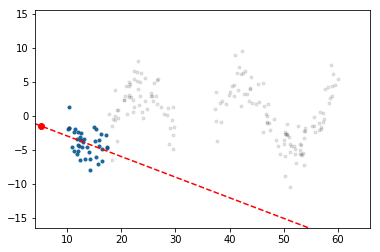

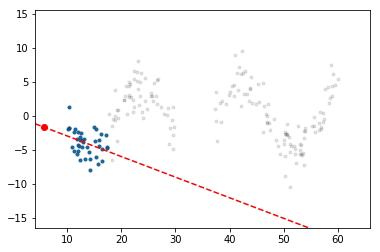

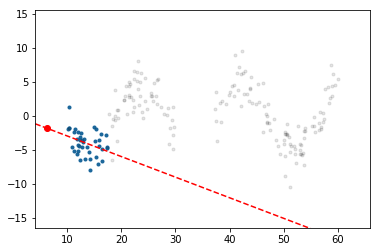

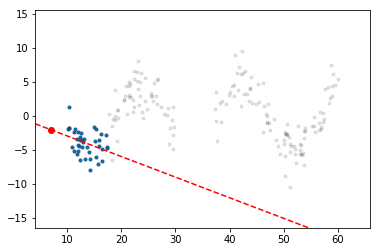

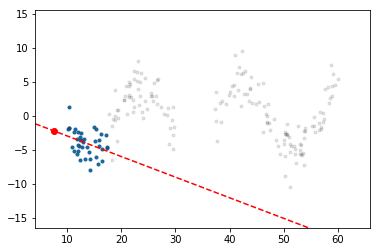

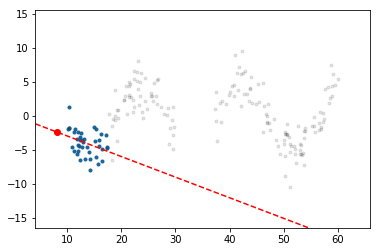

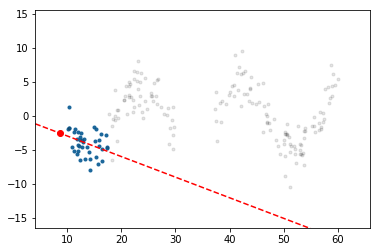

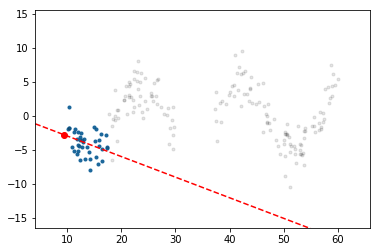

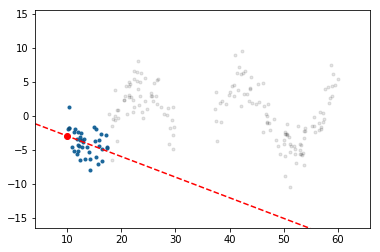

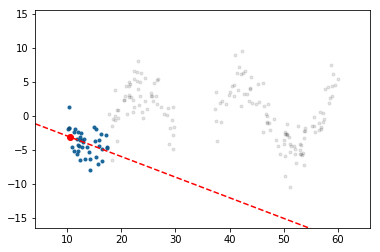

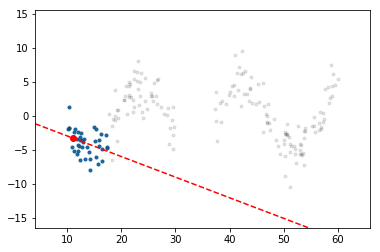

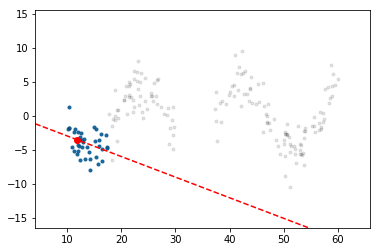

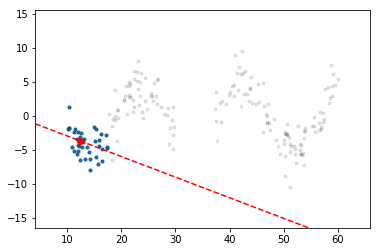

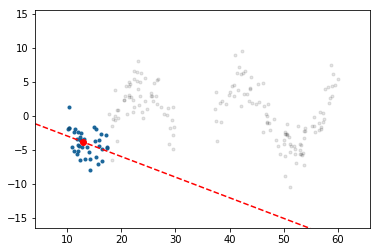

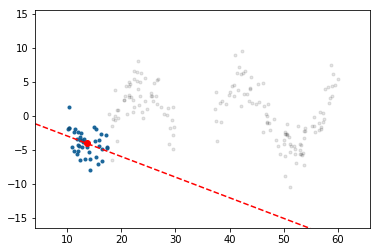

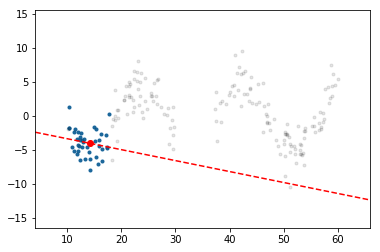

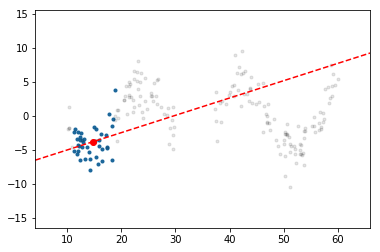

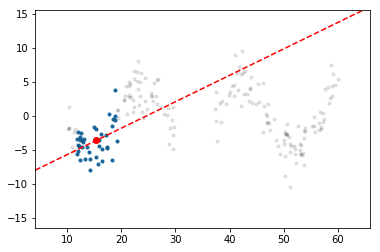

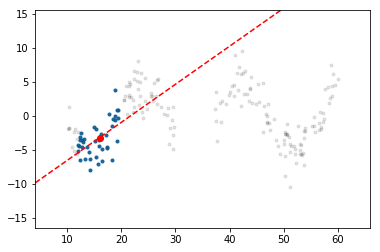

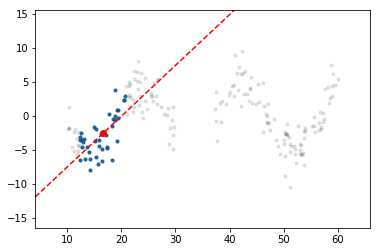

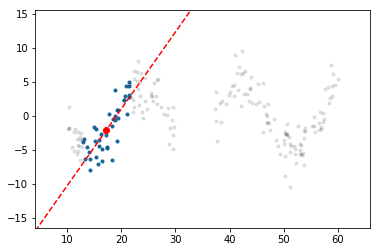

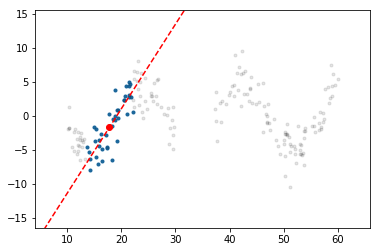

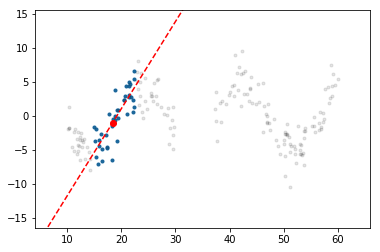

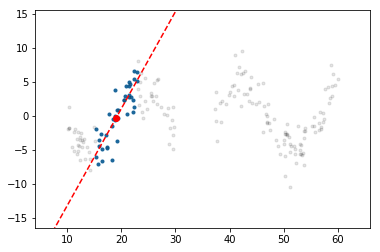

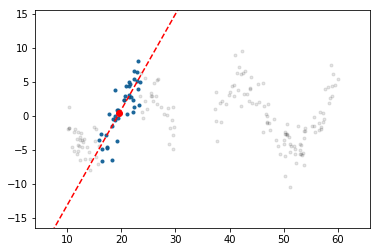

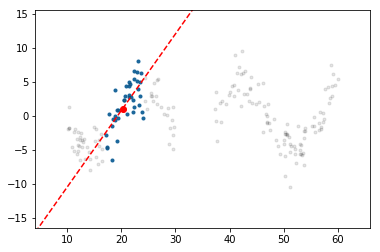

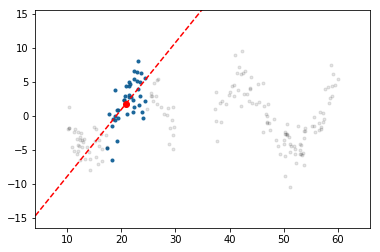

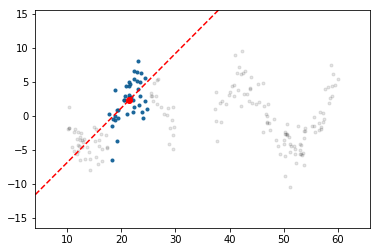

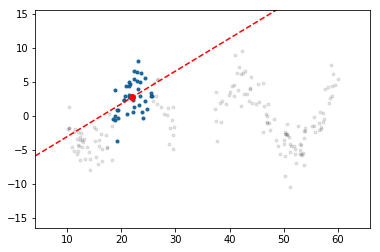

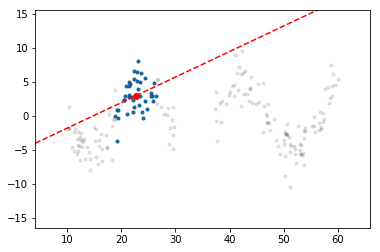

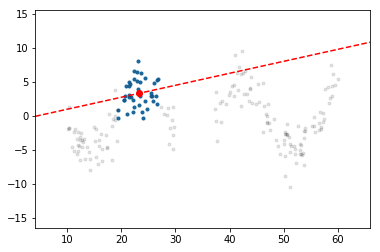

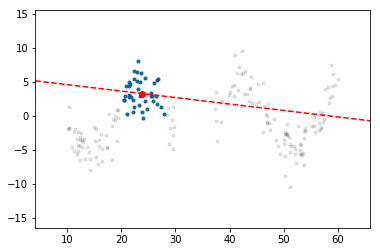

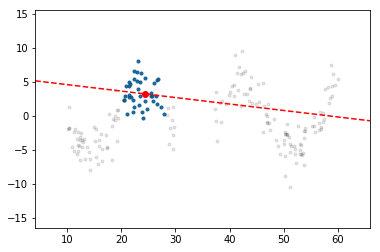

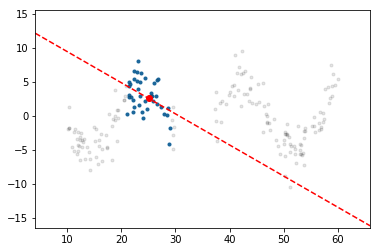

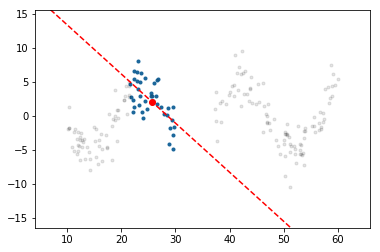

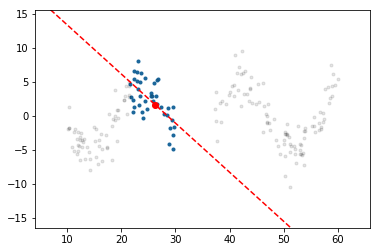

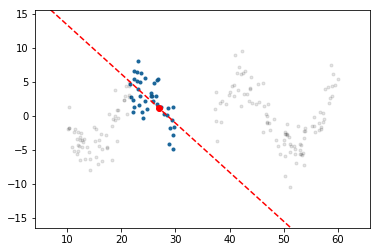

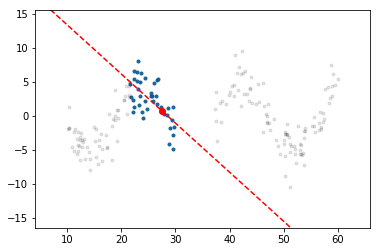

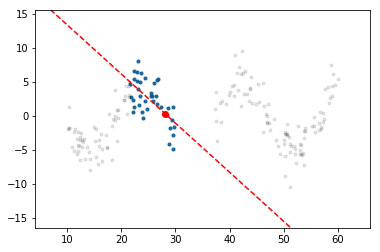

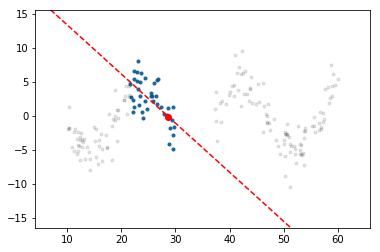

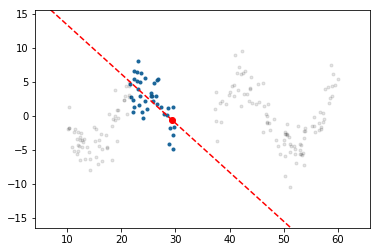

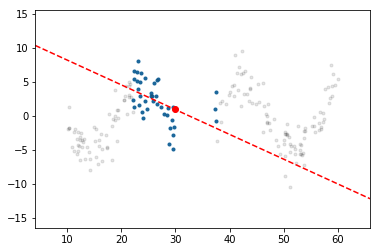

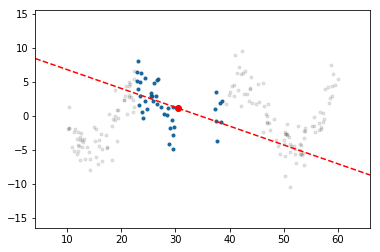

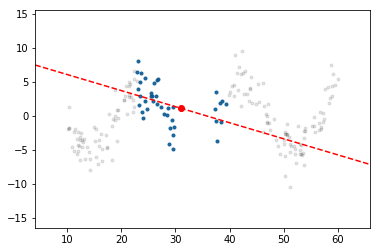

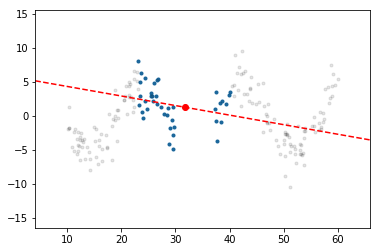

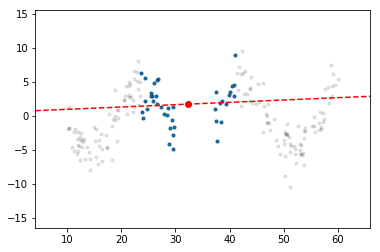

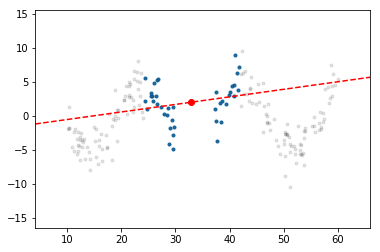

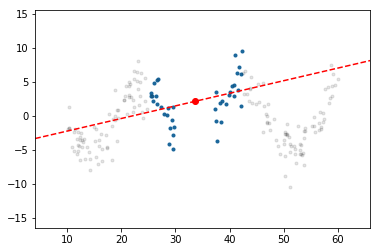

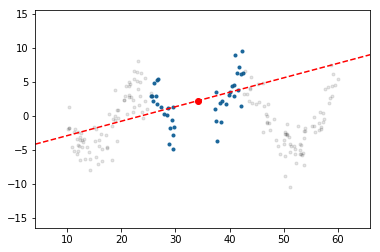

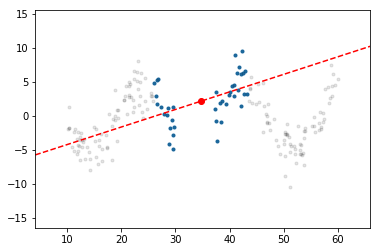

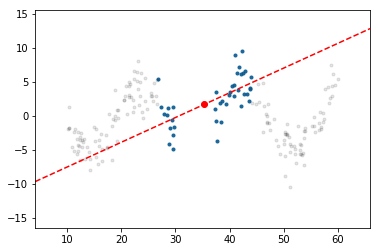

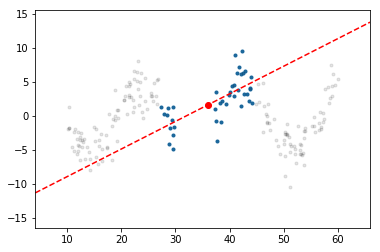

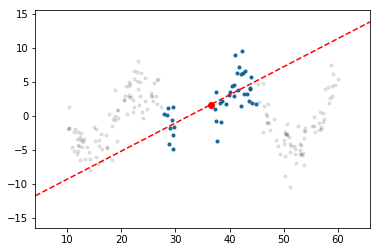

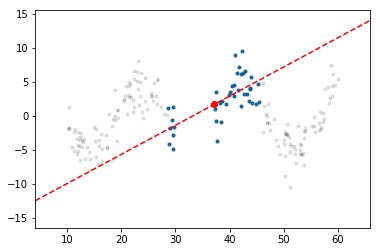

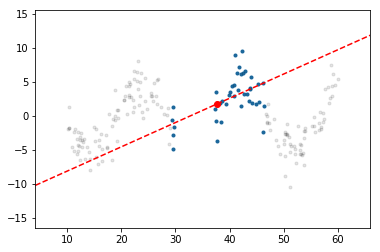

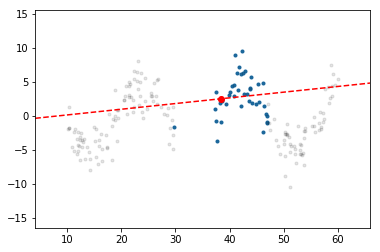

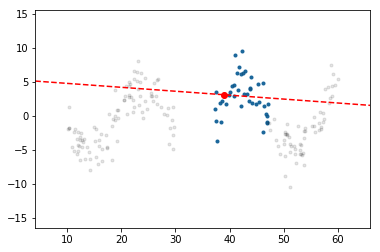

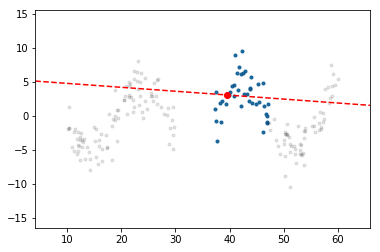

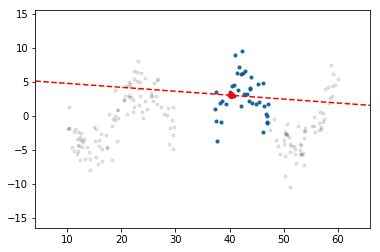

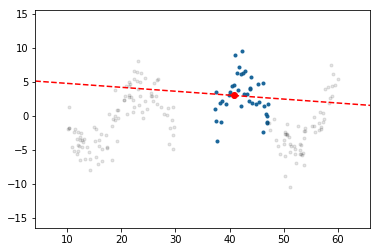

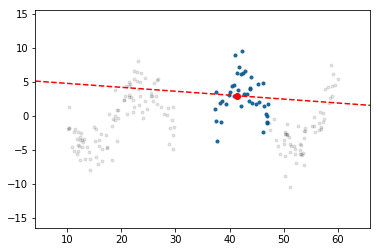

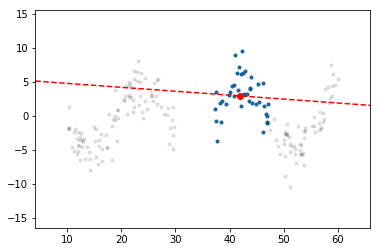

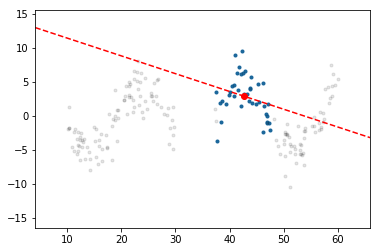

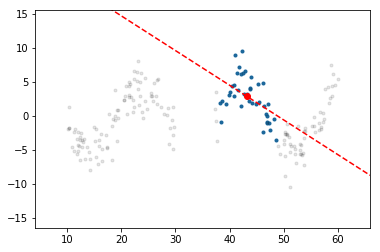

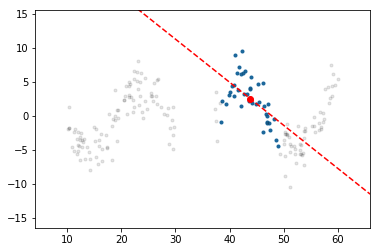

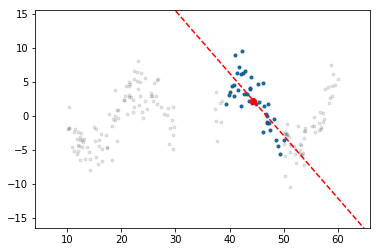

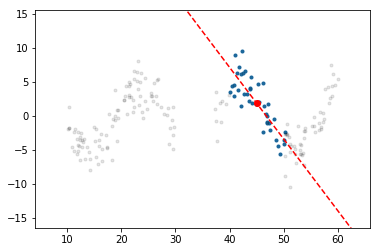

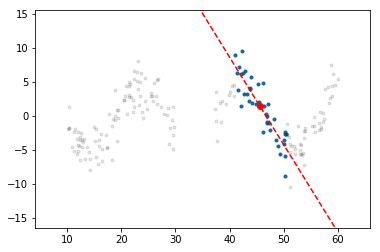

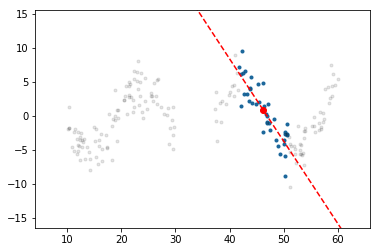

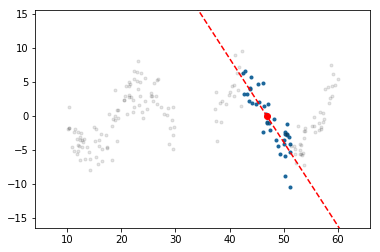

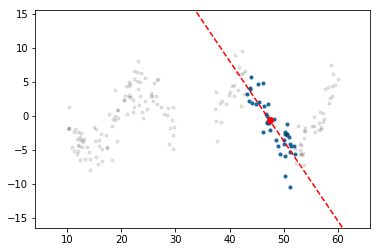

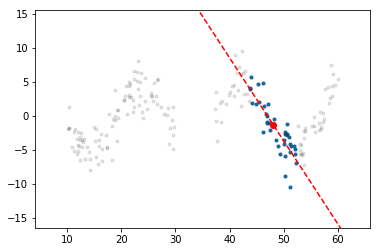

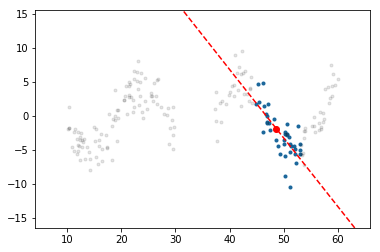

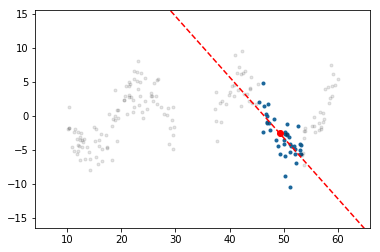

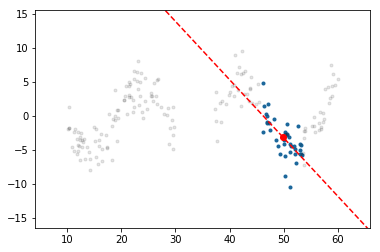

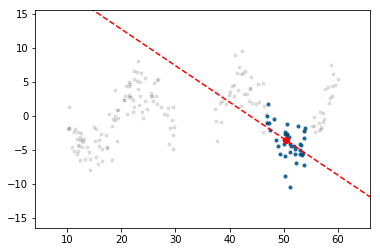

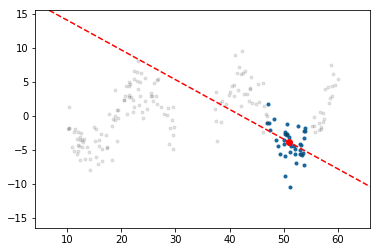

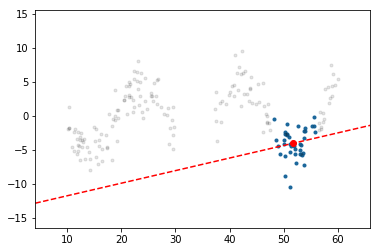

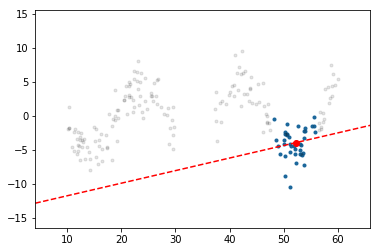

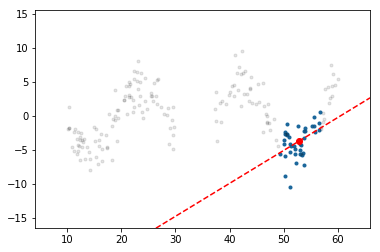

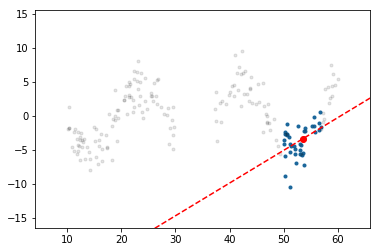

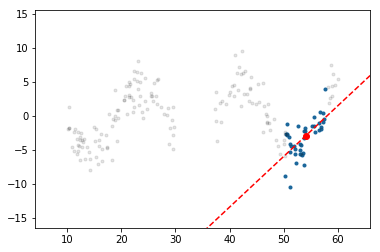

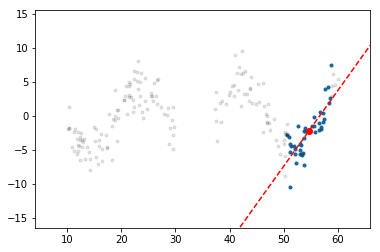

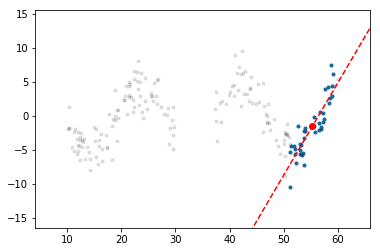

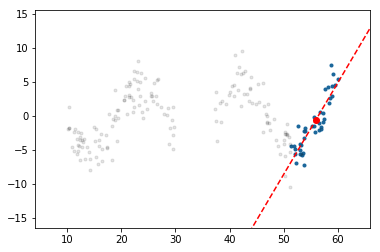

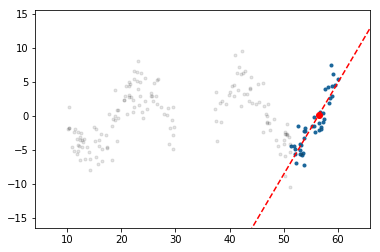

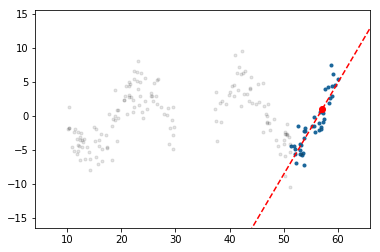

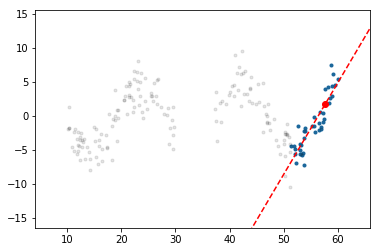

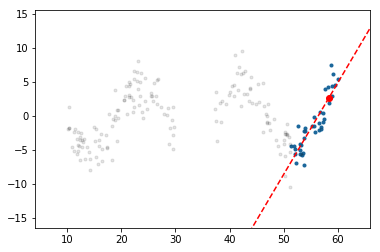

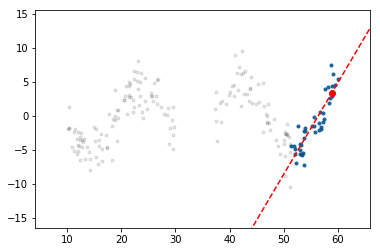

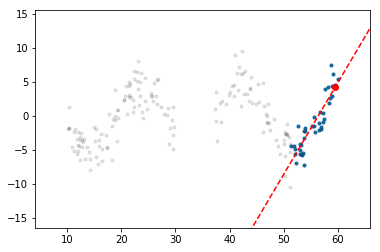

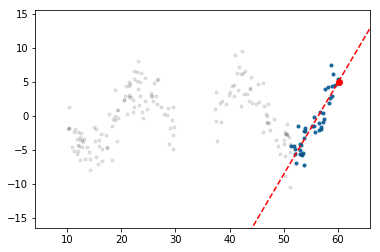

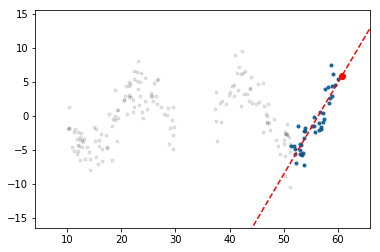

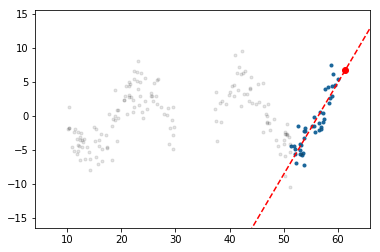

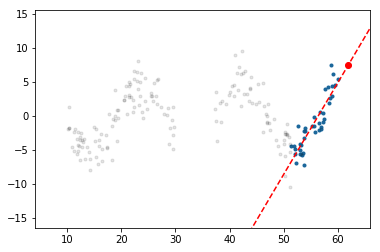

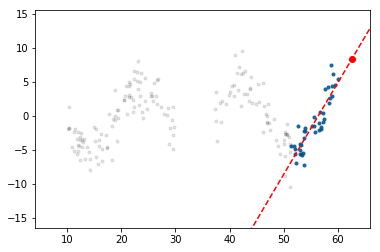

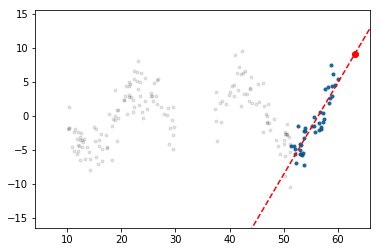

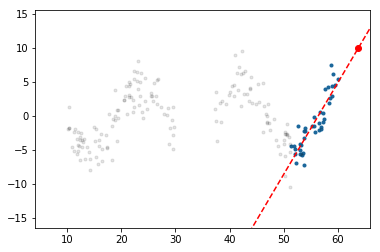

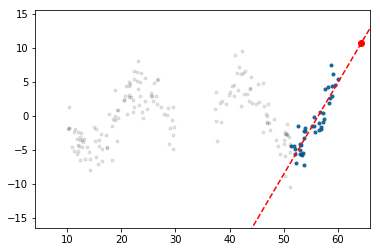

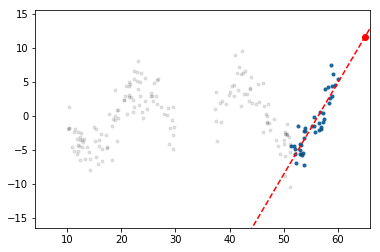

In [5]:
for index, x_pred in enumerate(x_preds):
    fig, ax = plt.subplots(1,1)
    ax.set_xlim(left=xs.min()-6, right=xs.max()+6)
    ax.set_ylim(bottom=ys.min()-6, top=ys.max()+6)
    
    x_window = model.xs[indices[index]]
    y_window = model.ys[indices[index]]
    ax.plot(x_window, y_window, '.')
    
    ax.plot(model.xs, model.ys, 'k.', alpha=0.1)
    ax.plot(x_pred, y_preds[index], 'ro')
    
    coef = LinearRegression().fit(x_window.reshape(-1,1),y_window.reshape(-1,1)).coef_.flatten()
    x_vals = np.array(ax.get_xlim())
    y_vals = y_preds[index] + coef * (x_vals-x_pred)
    ax.plot(x_vals, y_vals, 'r--')

# Full plot

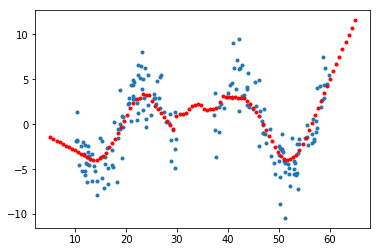

In [7]:
plt.plot(xs,ys,'.')
plt.plot(x_preds,y_preds,'r.')

# Tests
- fit
- _get_window_indices
- _create_weights
- predict

In [105]:
import pytest

# fit - normal
x = np.random.random(size=10)
y = np.random.random(size=10)

model = LoessRegressor(span=0.5).fit(x,y)
assert (x, y) == (model.xs, model.ys)

# fit - empty frame or inconsistent sizes

with pytest.raises(ValueError):
    x = np.array([])
    model = LoessRegressor(span=0.5).fit(x,y)
    
    x = np.random.random(size=10)
    y = np.array([])
    model = LoessRegressor(span=0.5).fit(x,y)
    
    x = np.random.random(size=2)
    y = np.random.random(size=9)
    model = LoessRegressor(span=0.5).fit(x,y)
    
# init

# Create x vector such that value is equal to index
xs = np.linspace(start=0, stop=9, num=10)
ys = np.random.random(size=10)

# OK spans
model = LoessRegressor(span=.6).fit(xs,ys)
model = LoessRegressor(span=1).fit(xs,ys)

# Faulty spans
with pytest.raises(ValueError):
    model = LoessRegressor(span=0).fit(xs,ys)
    model._get_window_indices(x[0].reshape(-1,1))
    
    model = LoessRegressor(span=2).fit(x,y)
    model._get_window_indices(x[0].reshape(-1,1))
    
# _get_window_indices

# 100% window
model = LoessRegressor(span=1).fit(xs,ys)
assert all(xs == model._get_window_indices(xs.reshape(-1,1)))


model = LoessRegressor(span=0.1).fit(xs,ys)
assert all(x == model._get_window_indices(x.reshape(-1,1)) for x in xs)

model = LoessRegressor(span=0.5).fit(xs,ys)
expected = {0, 1, 2, 3, 4}
result = set(model._get_window_indices(xs[0].reshape(-1,1)))
assert expected == result

expected = {1, 2, 3, 4, 5}
result = set(model._get_window_indices(xs[3].reshape(-1,1)))
assert expected == result

expected = {4, 5, 6, 7, 8}
result = set(model._get_window_indices(xs[6].reshape(-1,1)))
assert expected == result

expected = {5, 6, 7, 8, 9}
result = set(model._get_window_indices(xs[-1].reshape(-1,1)))
assert expected == result

# _create_weights

In [59]:
expected_weighting_methods = ['euclidean', 'equal']
test = None
if test not in expected_weighting_methods:
    raise ValueError(f"Received unexpected weighting method. Choose one from: {expected_weighting_methods}")

ValueError: Received unexpected weighting method. Choose one from: ['euclidean', 'equal']

In [33]:
x = np.random.random(size=10)
y = np.random.random(size=9)
LinearRegression().fit(x.reshape(-1,1),y)

ValueError: Found input variables with inconsistent numbers of samples: [10, 9]

In [28]:
if not x.size > 0:
    print('yes')

yes
